<a href="https://colab.research.google.com/github/JohnBirgerMorud/EE4309_proj/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE4309 Object Detectation Project - Google Colab Version

This notebook maintains the same experience as the local Makefile commands, allowing you to easily run the project on Colab.

## 📝 Important Notes
1. **Enable GPU**: Click `Runtime` → `Change runtime type` → Select `T4 GPU`
2. **Run Order**: Please run cells in sequence
3. **Command Mapping**: Each cell corresponds to a make command

# Introduction from student
The following is a brief explenation of how the notebook is structured. The experiments and result are presented and analysed after the Eval section. The purpose of the experiments is to show what was tested during the project and the insights gained. Due to limited GPU resources and time constraints, not every experiment could be run for the desired duration. Nevertheless, the results provide useful insights. Only code necessary for plotting is included in the notebook. All other code is available in the submitted code folder.

If the figures don´t show by default, the code from the git repository have to be cloned to the notebook before running the python commands. The figures are stored in a folder there.

## 🔧 Step 0: Clone Project and Enter Directory

In [2]:
!git clone https://github.com/JohnBirgerMorud/EE4309_proj.git
%cd EE4309_proj
!pwd

Cloning into 'EE4309_proj'...
remote: Enumerating objects: 411, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 411 (delta 113), reused 91 (delta 83), pack-reused 270 (from 1)
Receiving objects: 100% (411/411), 318.53 KiB | 1.87 MiB/s, done.
Resolving deltas: 100% (260/260), done.
/content/EE4309_proj
/content/EE4309_proj


## 📦 Step 1: Setup (equivalent to `make setup`)

In [7]:
# Install project dependencies (equivalent to make setup)
!pip install -q -r requirements.txt -e .

# Verify environment
import torch
print(f"✅ PyTorch version: {torch.__version__}")
print(f"✅ CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"✅ GPU: {torch.cuda.get_device_name(0)}")
    print(f"✅ GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ee4309-vitdet (pyproject.toml) ... done
✅ PyTorch version: 2.8.0+cu126
✅ CUDA available: True
✅ GPU: Tesla T4
✅ GPU Memory: 14.7 GB


## 📋 Help (equivalent to `make help`)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Show all available commands (equivalent to make help)
!make help

## 🖼️ Step 2: Download Samples (equivalent to `make samples`)

In [ ]:
# Download sample images (equivalent to make samples)
!make samples

bash scripts/download.sh
📥 Downloading sample images to data/sample_images
1. Downloading image with person...
2. Downloading image with dog...
3. Downloading image with horses...
4. Downloading image with eagle...

📊 Download results:
✅ Successfully downloaded 4 sample images
📁 Image list:
-rw-r--r-- 1 root root 160K Oct 24 12:49  data/sample_images/dog.jpg
-rw-r--r-- 1 root root 139K Oct 24 12:49  data/sample_images/eagle.jpg
-rw-r--r-- 1 root root 131K Oct 24 12:49  data/sample_images/horses.jpg
-rw-r--r-- 1 root root 112K Oct 24 12:49  data/sample_images/person.jpg

🚀 Now you can run inference test:
   bash scripts/infer.sh runs/frcnn_r50fpn_voc07/best.pt data/sample_images/

💡 Tips:
1. You can also copy your own images to data/sample_images directory
2. Supported formats: jpg, jpeg, png
3. Images should preferably contain objects from VOC dataset's 20 classes


## 🚀 Step 3: Train Model (equivalent to `make train`)

**Note**: On Colab, consider using fewer epochs to save time

In [ ]:
# Standard training (equivalent to make train)
# model choices: "reset50", "vit"

# NB! To ensure correct saving to google drive, the model name in line 136 in
# train.py have to be set to the desired file name, as it will be created in
# drive if it does not exist.
!make train BATCH_SIZE=2 EPOCHS=20 MODEL="resnet50" LR=0.001 N_WORKERS=6


## 📊 Step 4: Evaluate Model (equivalent to `make eval`)

In [ ]:
# Evaluate the model (equivalent to make eval)
!make eval MODEL="resnet50" WEIGHTS="/content/drive/MyDrive/checkpoints/resnet_pretrained_tor1830.pt"

bash scripts/evaluate.sh "/content/drive/MyDrive/checkpoints/resnet_pretrained_tor1830.pt" "test" "500" "resnet50"
🚀 Starting evaluation...
Weights: /content/drive/MyDrive/checkpoints/resnet_pretrained_tor1830.pt
Image set: test
Subset size: 500
Model (requested/default): resnet50

/usr/local/lib/python3.12/dist-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.3.5) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
Opening dataset in read-only mode as you don't have write permissions.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/pascal-voc-2007-test

hub://activeloop/pascal-voc-2007-test loaded successfully.

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 

# Experiments and analysis
During this project, different models were tested: ResNet with and without pretraining, and ViT without pretraining. In the following, the experiments done with these models will be explained, and their results commented. It was experimented with tuning different parameters of the models, but only experiments with learning rate will be presented.

# ResNet without pretraining

In [ ]:
from IPython.display import Image, display

The ResNet model without pretrained weights was able to learn, but its overall performance remained low. Despite the model´s limitations, performance varied significantly, and it was observed that choosing a suitable learning rate was crucial. A learning rate of 0.002 was too small for effective training, while experimentation showed that a learning rate of 0.02 produced the best results. After 14 epochs, the model achieved a maximum accuracy of 8.92%.

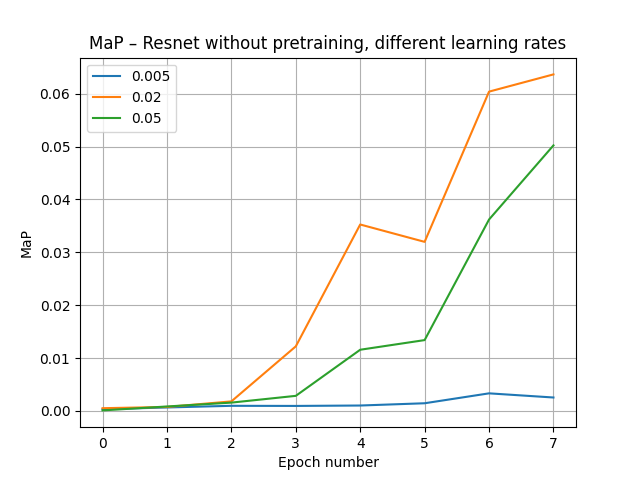

In [ ]:
display(Image(filename='/content/EE4309_proj/plots/MaP - Resnet without pretrained different lr.png'))


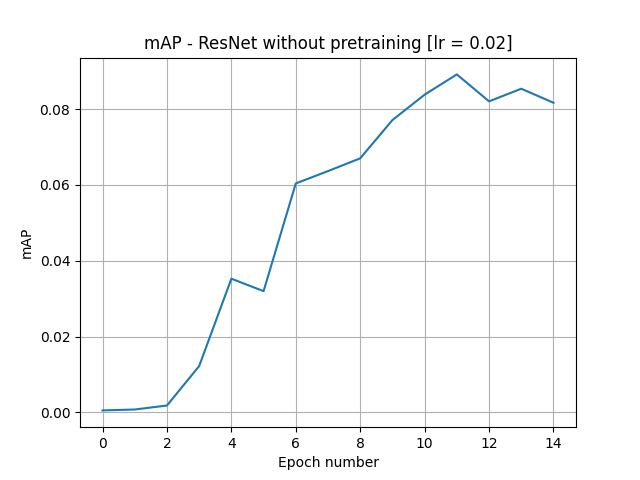

In [ ]:
display(Image(filename='/content/EE4309_proj/plots/MaP - Resnet without pretrain lr002.png'))

The low overall mAP is likely due to a dataset that is too small, which  prevents extensive training without overfitting. It may also be the case that learning low level features that are necessary as a foundation for image classification requires a lot more data. Findings in the next chapter about pretraining the model support this observation.

## Resnet with pretrained weigths
Using pretrained weigths on the model before doing spesific training on the PASCAL VOC 2007 dataset gave drastic improvements to performance. The best MaP value was 46.9%. The figure below shows the results from running the pretrained ResNet for 16 epochs.

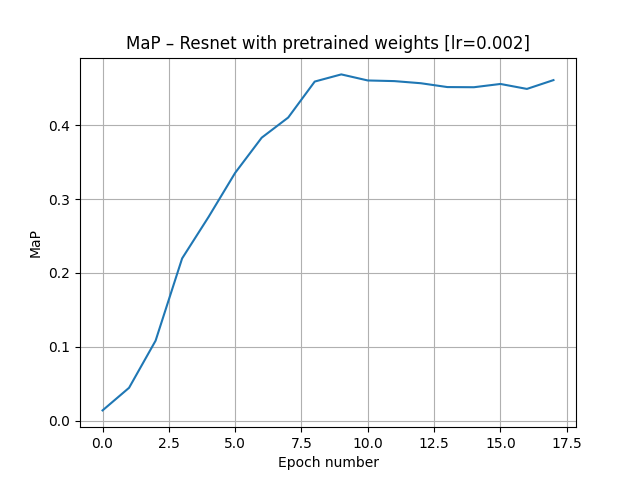

In [ ]:
display(Image(filename='/content/EE4309_proj/plots/MaP_Resnet_pretrained.png'))

It can be observed that with pretrained weights, the model learns faster from the dataset. The significant improvement is likely because the model has already learned low-level features, making it better suited to learn more abstract or advanced representations. As a result, the small dataset and limited number of epochs are sufficient to achieve much better performance.

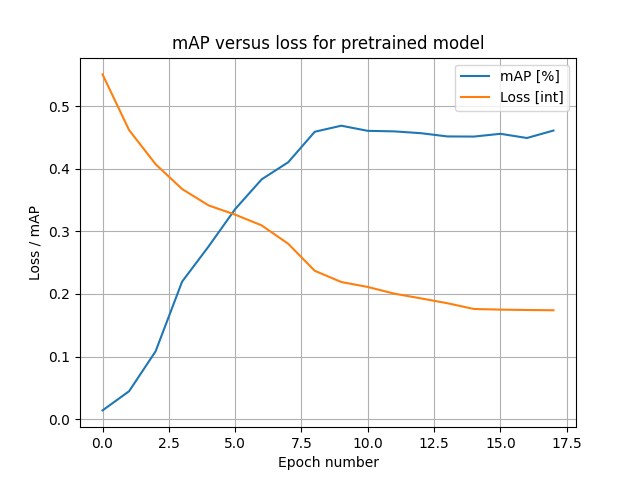

In [ ]:
display(Image(filename='/content/EE4309_proj/plots/map versus loss pretrained resnet.png'))

#Vision transformer model - ViT
The ViT was only tested using non-pretrained weights. Some simple plots are presented below. It shows that a learning rate of 0.03 works significantly worse than both 0.01 and 0.005. Both of the latter seems promising, and a learning rate of 0.01 was run a total 14 epochs, and resulted in a performance of 9.67% mAP (as also presented in the table under the evaluation header.

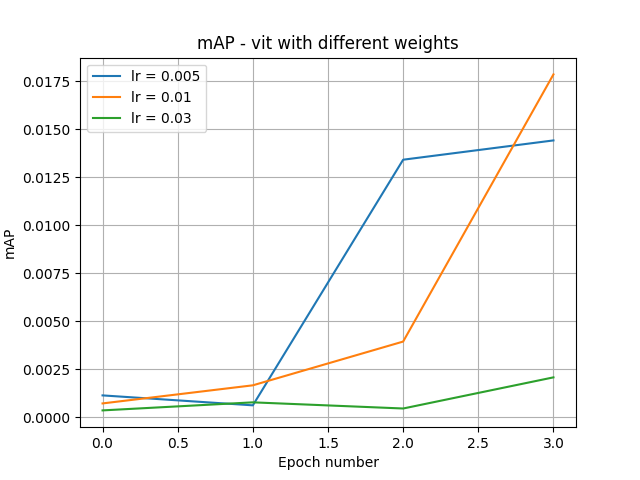

In [ ]:
display(Image(filename='/content/EE4309_proj/plots/vit_with_different_lr.png'))

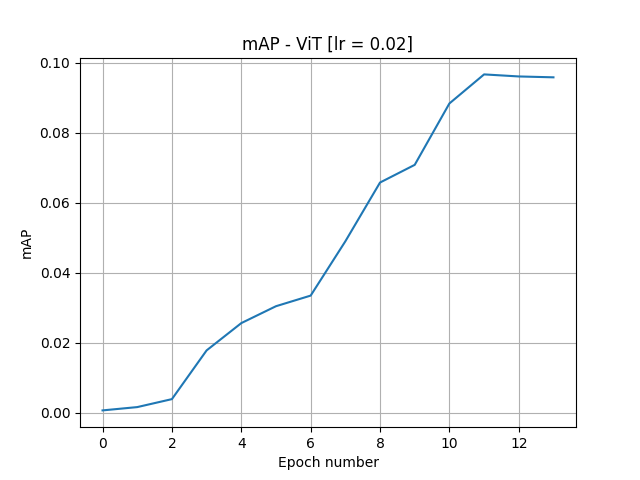

In [ ]:
display(Image(filename='/content/EE4309_proj/plots/vit_001.png'))

#Eval function on different models
The eval function was run for the experiments described above, and the most interesting findings are summarized in the table below.

| Model | mAP |
|----------|----------
| ResNet pretrained lr=0.002    | 50.27%   
| ResNet lr = 0.02              | 10.78%  
| ResNet lr = 0.005             | 0.16%   
| ViT    lr = 0.01              | 9.66%   

Two key insights are worth noting. First, ResNet performed better than ViT. There are several possible reasons for this result. With limited computational resources, it is difficult to find the best tuned parameters for each model, and ViT might have performed better with additional tuning. Furthermore, the two architectures likely require different amounts of data to achieve sufficient parameter optimization.

Second, the mAP on the test set, obtained from running the “make eval” command, is as good as or better than the mAP performance on the validation set. This suggests that the model is not overfitted. However, it may indicate the possibility of underfitting, meaning the training did not fully converge and the model could benefit from a longer training period. As seen in the pretrained ResNet plot, the training loss decreases while the mAP remains constant over several iterations, suggesting convergence. Even if extended training might have improved performance, it was not conducted due to limited GPU resources and time constraints.

# Conclusion of results
In conclusion, both the ResNet and ViT models without pretraining were able to learn from the dataset, achieving mAPs of 10.8% and 9.7%, respectively. This indicates that the overall model architectures are capable of representing the non-linear structures needed for image classification, but the training was insufficient. The primary reasons appear to be a dataset that is too small, or that the training were not done for enough epochs. The first is probably correct. Pretraining the ResNet model resulted in a mAP of 50.3%, a drastic improvement that further supports this conclusion.

## 🔍 Step 5: Run Inference (equivalent to `make infer`)

In [ ]:
# Run inference (equivalent to make infer)
!make infer MODEL="resnet50" WEIGHTS="/content/drive/MyDrive/checkpoints/resnet_pretrained_tor1830.pt"

bash scripts/infer.sh "/content/drive/MyDrive/checkpoints/resnet_pretrained_tor1830.pt" "data/sample_images" "resnet50"
🚀 Running inference...
Weights: /content/drive/MyDrive/checkpoints/resnet_pretrained_tor1830.pt
Input: data/sample_images
Model (requested/default): resnet50
/usr/local/lib/python3.12/dist-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.3.5) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
saved: runs/infer_vis/dog_det.jpg
saved: runs/infer_vis/eagle_det.jpg
saved: runs/infer_vis/horses_det.jpg
saved: runs/infer_vis/person_det.jpg
✅ Inference completed! Check results in runs/infer_vis/


## 📝 Submit Your Work (equivalent to `make submit`)

**Important**: This will create a git commit with your student information

In [10]:
# Submit your work with student information (equivalent to make submit)
# You will be prompted to enter:
# - Your full name
# - Your student ID (format: A0123456X)
# - Optional additional message
# Please run this command before compressing and submitting your project.
!make submit

bash scripts/submit.sh
    EE4309 ViTDet Project Submission Tool

📝 Please enter your information:

Enter your full name: John Birger Morud
Enter your student ID (e.g., A0123456X): A0332794W
Enter additional message (optional, press Enter to skip): 

📦 Preparing submission...

📊 Changes to be submitted:
----------------------------
 src/engine/train.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
----------------------------

📝 Modified files:
 M src/engine/train.py

📂 Staging all changes...

📄 Commit message preview:
----------------------------
[SUBMISSION] John Birger Morud (A0332794W)

Student Name: John Birger Morud
Student ID: A0332794W
Submission Time: 2025-10-24 13:44:53
----------------------------

Confirm submission? (Y/n): Y

💾 Creating commit...
[main b756e63] [SUBMISSION] John Birger Morud (A0332794W)
 1 file changed, 1 insertion(+), 1 deletion(-)

✅ Submission Successful!

📌 Your submission has been recorded:
  👤 Student Name: John Birger Morud
  🆔 Student ID: A

In [12]:
!git diff HEAD~1

diff --git a/src/engine/train.py b/src/engine/train.py
index df89dc7..f3a5ba4 100644
--- a/src/engine/train.py
+++ b/src/engine/train.py
@@ -133,7 +133,7 @@ def main():
     best_map = -1.0
 
     # Code to write and read model and data file from google disk
-    experiment = "resnet_pretrained_lr001_bz4"
+    experiment = "resnet_pretrained_lr001_bz"
     file_path = f"/content/drive/MyDrive/checkpoints/{experiment}.pt"
     data_file_path = f"/content/drive/MyDrive/checkpoints/data_{experiment}.txt"
     if not os.path.exists(data_file_path) or os.path.getsize(data_file_path) == 0:


---

## 💾 Extra: Save to Google Drive

In [ ]:
# Mount Google Drive to save training results
from google.colab import drive
drive.mount('/content/drive')

# Create save directory
!mkdir -p /content/drive/MyDrive/EE4309_results

# Copy training results
!cp -r runs/* /content/drive/MyDrive/EE4309_results/
print("✅ Results saved to Google Drive!")

MessageError: Error: credential propagation was unsuccessful

\## 📈 Visualize Inference Results

Displaying inference detection results:


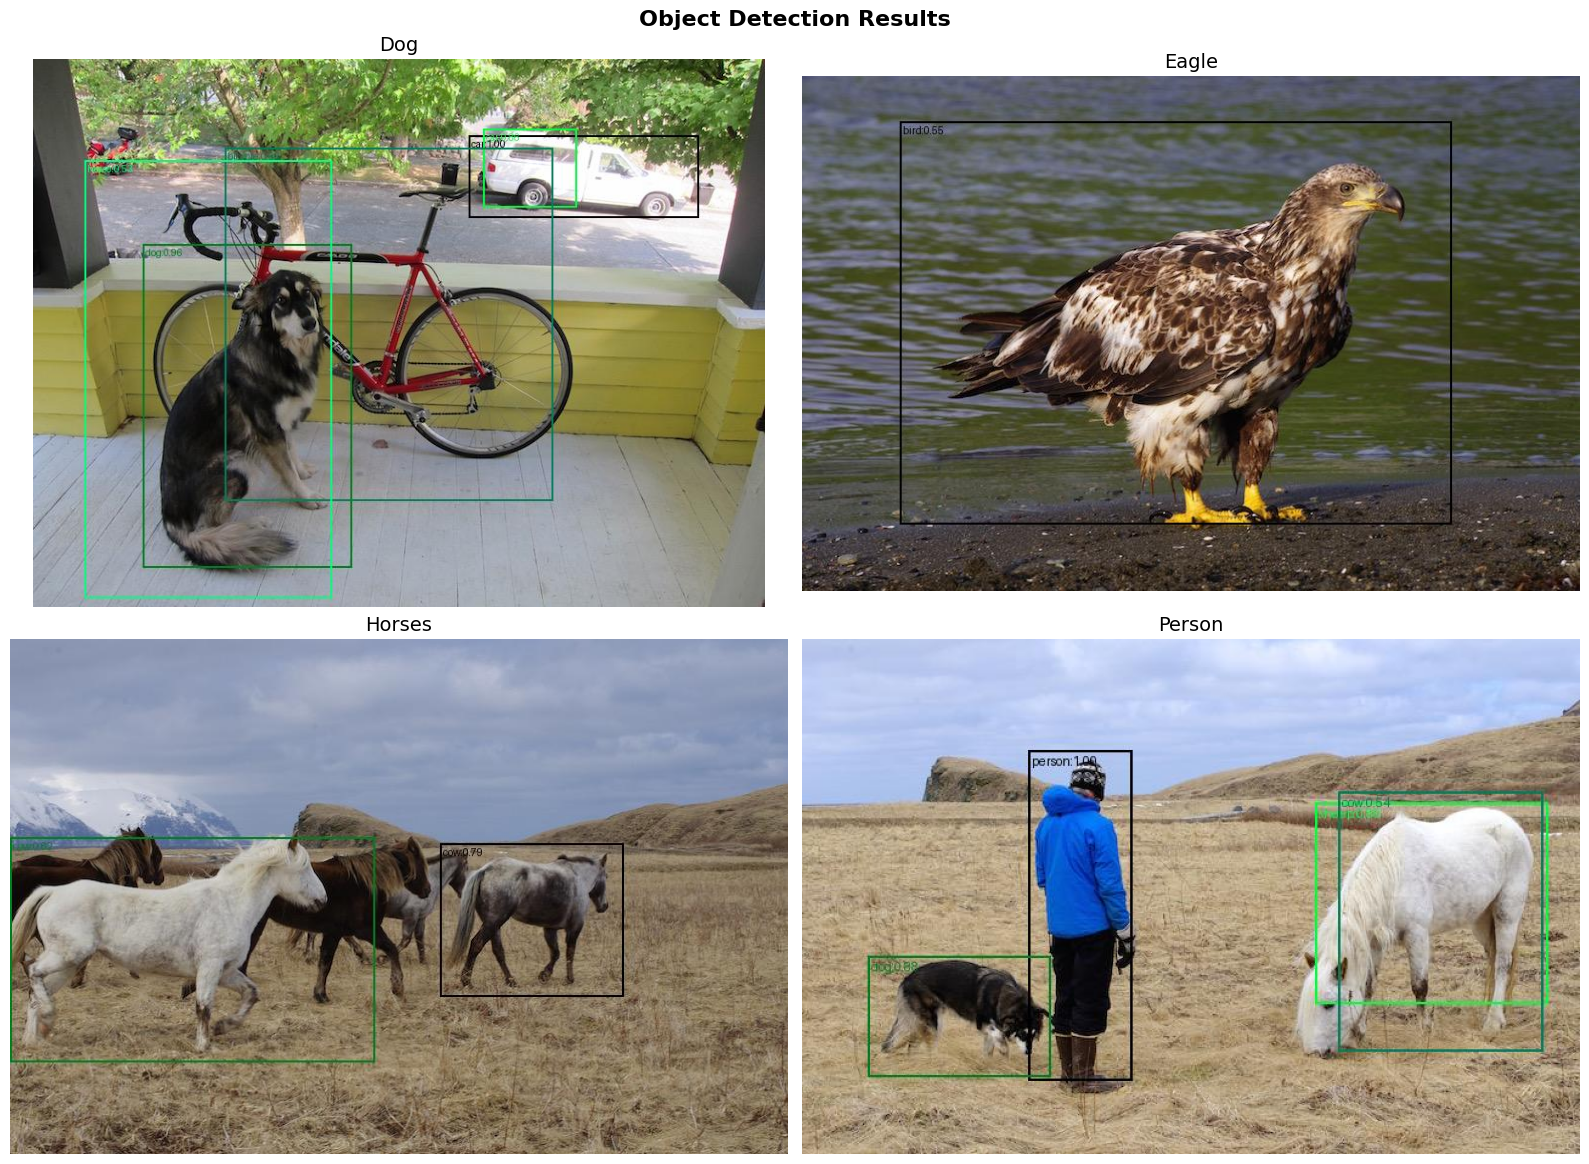

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Detection result images to display
detection_images = [
    'runs/infer_vis/dog_det.jpg',
    'runs/infer_vis/eagle_det.jpg',
    'runs/infer_vis/horses_det.jpg',
    'runs/infer_vis/person_det.jpg'
]

# Check which images exist
existing_images = [img for img in detection_images if os.path.exists(img)]

if len(existing_images) >= 4:
    print("Displaying inference detection results:")

    # Create 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Object Detection Results', fontsize=16, fontweight='bold')

    # Flatten axes for easy iteration
    axes_flat = axes.flatten()

    for i, img_path in enumerate(existing_images[:4]):
        try:
            img = mpimg.imread(img_path)
            axes_flat[i].imshow(img)
            # Extract image name without extension for title
            img_name = os.path.basename(img_path).replace('_det.jpg', '')
            axes_flat[i].set_title(img_name.title(), fontsize=14)
            axes_flat[i].axis('off')
        except Exception as e:
            axes_flat[i].text(0.5, 0.5, f'Error loading\n{os.path.basename(img_path)}',
                            ha='center', va='center', transform=axes_flat[i].transAxes)
            axes_flat[i].axis('off')

    plt.tight_layout()
    plt.show()

elif len(existing_images) > 0:
    print(f"Found {len(existing_images)} detection results:")

    # Calculate grid size for available images
    n_images = len(existing_images)
    n_cols = min(2, n_images)
    n_rows = (n_images + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    fig.suptitle('Available Detection Results', fontsize=16, fontweight='bold')

    # Handle single image case
    if n_images == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if hasattr(axes, '__iter__') else [axes]
    else:
        axes = axes.flatten()

    for i, img_path in enumerate(existing_images):
        try:
            img = mpimg.imread(img_path)
            axes[i].imshow(img)
            img_name = os.path.basename(img_path).replace('_det.jpg', '')
            axes[i].set_title(img_name.title(), fontsize=14)
            axes[i].axis('off')
        except Exception as e:
            axes[i].text(0.5, 0.5, f'Error loading\n{os.path.basename(img_path)}',
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')

    # Hide empty subplots
    for i in range(n_images, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

else:
    print("❌ No detection result images found.")
    print("Please run inference first:")
    print("!make infer")

## 📊 Check Git History (View Submission Records)

In [ ]:
# View git commit history to check submissions
!git log --oneline -n 5

In [ ]:
# View detailed changes in the last commit
!git diff HEAD~1 --stat

## ⚠️ Troubleshooting

### 1. GPU Out of Memory
```bash
# Reduce batch size
!bash scripts/train.sh --batch-size 64 --epochs 20
```

### 2. Runtime Limits
- Colab free tier has ~12 hour limit
- Use checkpoint feature to train in segments
- Save to Google Drive regularly

### 3. Disconnection Issues
- Use resume training feature above to continue
- Consider Colab Pro for longer runtime

### 4. Submission Issues
- Make sure you run `make submit` before the deadline
- Use `git log` to verify your submission was recorded
- Your instructor can use `git diff` to review your changes